In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lattice import Lattice2D, RectangularLatticeGeometry, SimulationParameters

In [7]:
# Fixed parameters
omega = 2 * np.pi / 4
h = 5e-3  # Fixed step size
T = 10    # Fixed total time

# Define different lattice sizes to test
# Each tuple is (width, height)
lattice_sizes = [
    (5, 5),   # 25 sites
    (7, 7),   # 49 sites
    (10, 10), # 100 sites
    (12, 12), # 144 sites
    (15, 15), # 225 sites
    (17, 17), # 289 sites
    (20, 20), # 400 sites
    (25, 25), # 625 sites
    (30, 30)  # 900 sites
]

# Scaling Tests

Test how RK4 solver computation time scales with increasing lattice size.

In [8]:
import time

# Function to run simulation and return results and timing
def run_simulation(lattice_size):
    start_time = time.time()
    
    # Create geometry with the given size
    geometry = RectangularLatticeGeometry(lattice_size)
    
    params = SimulationParameters(
        t_hop=1.0,
        E_amplitude=lambda t: np.sin(omega * t),
        E_direction=np.array([0, -1]),
        h=h,
        T=T,
        charge=1,
        initial_occupation=0.5,
    )
    
    lattice = Lattice2D(geometry, params)
    lattice.evolve(solver="rk4", use_sparse=True)
    final_state = lattice.states[-1].density.diagonal().real
    
    elapsed_time = time.time() - start_time
    return final_state, elapsed_time, lattice_size[0] * lattice_size[1]  # Return site count too

In [9]:
results = []
times = []
site_counts = []

for size in reversed(lattice_sizes):
    print(f"Running with lattice size {size[0]}x{size[1]} ({size[0]*size[1]} sites)")
    
    final_state, elapsed, site_count = run_simulation(size)
    results.append(final_state)
    times.append(elapsed)
    site_counts.append(site_count)
    
    print(f"Completed in {elapsed:.2f} seconds")

Running with lattice size 30x30 (900 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [02:27<00:00, 13.60it/s]
/Users/leonard/dev/projects/university/orbitronics_research_project/lattice/lattice.py:57: UserWarning: Site number should be even--then integer # of states can be set with half occupation.
  warnings.warn(


Completed in 276.13 seconds
Running with lattice size 25x25 (625 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:51<00:00, 39.11it/s]


Completed in 88.61 seconds
Running with lattice size 20x20 (400 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:17<00:00, 111.66it/s]


Completed in 22.51 seconds
Running with lattice size 17x17 (289 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:09<00:00, 209.78it/s]


Completed in 12.66 seconds
Running with lattice size 15x15 (225 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:06<00:00, 306.60it/s]


Completed in 8.95 seconds
Running with lattice size 12x12 (144 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:03<00:00, 592.93it/s]


Completed in 4.81 seconds
Running with lattice size 10x10 (100 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:01<00:00, 1050.35it/s]


Completed in 3.01 seconds
Running with lattice size 7x7 (49 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.51.


100%|██████████| 2000/2000 [00:02<00:00, 776.64it/s]


Completed in 3.31 seconds
Running with lattice size 5x5 (25 sites)
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.52.


100%|██████████| 2000/2000 [00:00<00:00, 4163.42it/s]


Completed in 0.69 seconds


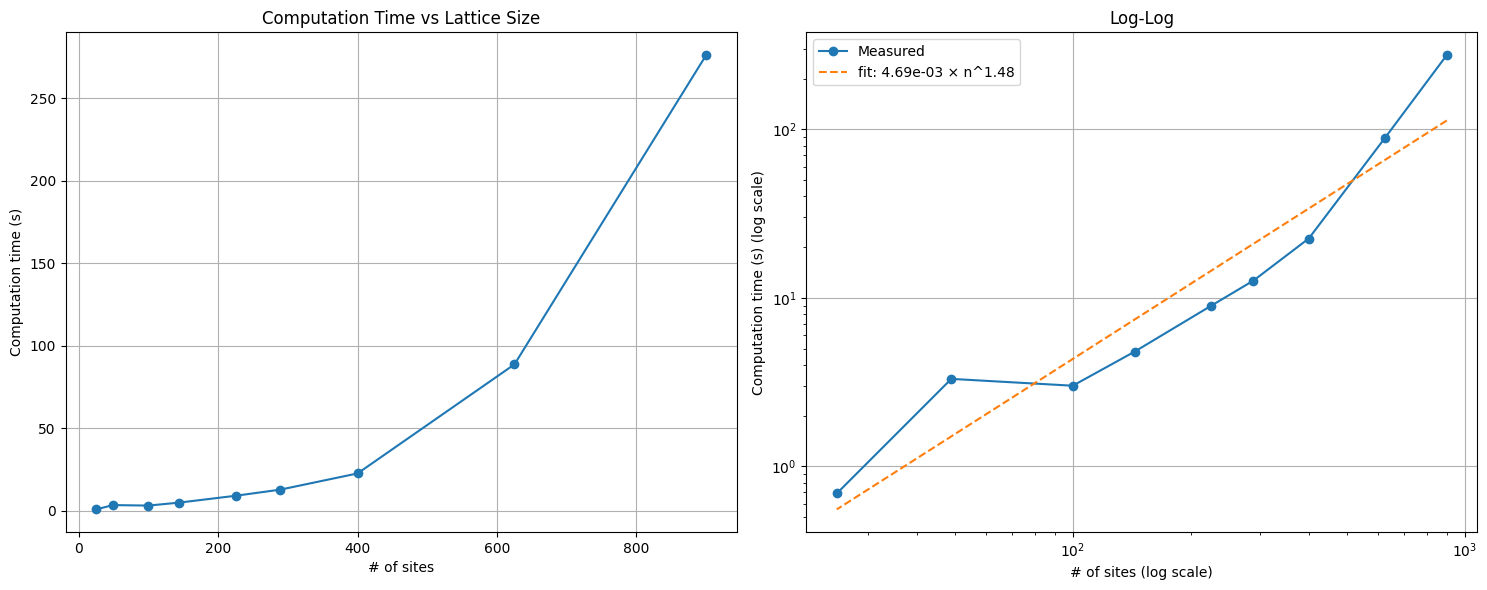

In [25]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot computation time vs number of sites
ax1.plot(site_counts, times, 'o-', label='Measured')
ax1.set_xlabel('# of sites')
ax1.set_ylabel('Computation time (s)')
ax1.set_title('Computation Time vs Lattice Size')
ax1.grid(True)

# Try to fit polynomial curves to determine scaling
# Linear fit (O(n))
# z1 = np.polyfit(site_counts, times, 1)
# p1 = np.poly1d(z1)
# ax1.plot(site_counts, p1(site_counts), '--', label=f'Linear fit: {z1[0]:.2e}x + {z1[1]:.2f}')

# # Quadratic fit (O(n²))
# z2 = np.polyfit(site_counts, times, 2)
# p2 = np.poly1d(z2)
# ax1.plot(site_counts, p2(site_counts), '-.', label=f'Quadratic fit')

# # Cubic fit (O(n³))
# z3 = np.polyfit(site_counts, times, 3)
# p3 = np.poly1d(z3)
# ax1.plot(site_counts, p3(site_counts), ':', label=f'Cubic fit')

# ax1.legend()

# Plot log-log to better visualize scaling behavior
ax2.loglog(site_counts, times, 'o-', label='Measured')
ax2.set_xlabel('# of sites (log scale)')
ax2.set_ylabel('Computation time (s) (log scale)')
ax2.set_title('Log-Log')
ax2.grid(True)

# Fit a power law (y = a * x^b)
log_sites = np.log(site_counts)
log_times = np.log(times)
coeffs = np.polyfit(log_sites, log_times, 1)
power_law = np.exp(coeffs[1]) * np.array(site_counts)**coeffs[0]
ax2.loglog(site_counts, power_law, '--', 
           label=f'fit: {np.exp(coeffs[1]):.2e} × n^{coeffs[0]:.2f}')
ax2.legend()

plt.tight_layout()
plt.savefig("examples/nsite_vs_comptime.png")
plt.show()

## Scaling Analysis

This analysis shows how the sparse RK4 solver's computation time scales with the number of lattice sites.
The power law exponent indicates the algorithmic complexity in practice.

In [11]:
# Print scaling results in a table
print("Lattice Size Scaling Results:")
print("-" * 70)
print(f"{'Lattice Size':<15} {'Sites':<10} {'Time (s)':<15} {'Time/Site (ms)':<15} {'Rel. Efficiency':<15}")
print("-" * 70)

# Calculate time per site and relative efficiency
times_per_site = [t/s * 1000 for t, s in zip(times, site_counts)]  # ms per site
rel_efficiency = [times_per_site[0]/t for t in times_per_site]  # relative to smallest lattice

for size, sites, t, tps, eff in zip(lattice_sizes, site_counts, times, times_per_site, rel_efficiency):
    size_str = f"{size[0]}×{size[1]}"
    print(f"{size_str:<15} {sites:<10} {t:<15.3f} {tps:<15.3f} {eff:<15.3f}")

print("\nPower Law Fit: Time ∝ n^{:.3f}".format(coeffs[0]))
if abs(coeffs[0] - 1.0) < 0.2:
    print("The solver appears to scale approximately linearly with lattice size.")
elif abs(coeffs[0] - 2.0) < 0.2:
    print("The solver appears to scale approximately quadratically with lattice size.")
elif abs(coeffs[0] - 3.0) < 0.2:
    print("The solver appears to scale approximately cubically with lattice size.")
else:
    print(f"The solver scales with lattice size with power {coeffs[0]:.2f}.")

Lattice Size Scaling Results:
----------------------------------------------------------------------
Lattice Size    Sites      Time (s)        Time/Site (ms)  Rel. Efficiency
----------------------------------------------------------------------
5×5             900        276.132         306.813         1.000          
7×7             625        88.612          141.779         2.164          
10×10           400        22.506          56.266          5.453          
12×12           289        12.662          43.812          7.003          
15×15           225        8.955           39.799          7.709          
17×17           144        4.805           33.369          9.195          
20×20           100        3.011           30.108          10.191         
25×25           49         3.305           67.459          4.548          
30×30           25         0.690           27.618          11.109         

Power Law Fit: Time ∝ n^1.483
The solver scales with lattice size with power 